#### 二叉树

1. 节点的高度：节点到叶子节点的最长路径（边长）
2. 节点的深度：根节点到这个节点所经历的边的个数
3. 节点的层数：节点的深度+1
4. 树的高度：根节点的高度

##### 满二叉树

叶子节点都在最底层，且除叶子节点外，所有节点都有左右两个子节点。

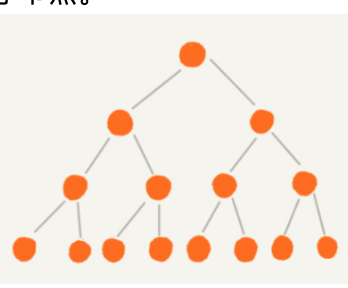

##### 完全二叉树

叶子节点都在最底下两层，最后一层的叶子节点都是靠左排列，除了最后一层，其他层数的节点都达到最大。

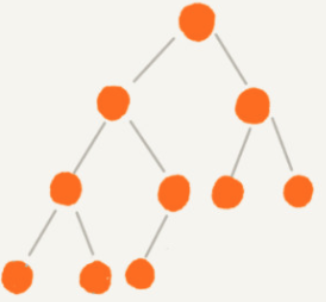

##### 如何存储一颗二叉树
1. 基于指针或者引用的二叉链式存储法
    * 每个节点有三个字段，其中一个存储数据，另外两个是指向左右子节点的指针。
    * 只要拎住根节点，就可以通过左右子节点的指针，把整棵树都串起来
    * 这种存储方式我们比较常用。大部分二叉树代码都是通过这种
     * 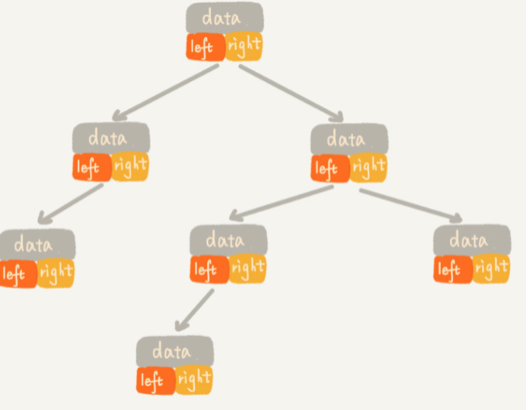

2. 基于数组的顺序存储法
    * 根节点存储在下标 i = 1 的位置（为了方便计算子节点，根节点会存储在下标为 1 的位置），
    * 那左子节点存储在下标 2 * i = 2 的位置，右子节点存储在 2 * i + 1 = 3 的位置。
    * 以此类推，B 节点的左子节点存储在 2 * i = 2 * 2 = 4 的位置，右子节点存储在 2 * i + 1 = 2 * 2 + 1 = 5 的位置。
    * 如果某棵二叉树是一棵完全二叉树，那用数组存储无疑是最节省内存的一种方式。因为数组的存储方式并不需要像链式存储法那样，要存储额外的左右子节点的指针。这也是为什么完全二叉树会单独拎出来的原因，也是为什么完全二叉树要求最后一层的子节点都靠左的原因。
    * 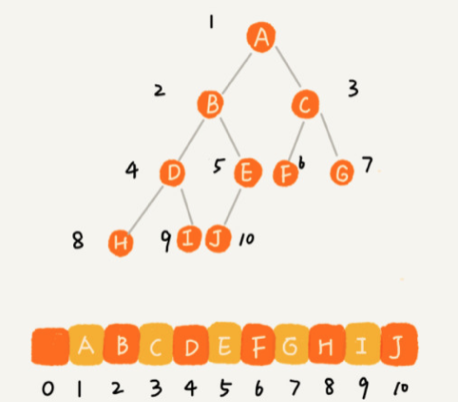


#### 二叉树遍历

* 前序遍历：对于树中的任意节点来说，先打印这个节点，然后再打印它的左子树，最后打印它的右子树。
* 中序遍历：对于树中的任意节点来说，先打印它的左子树，然后再打印它本身，最后打印它的右子树。
* 后序遍历：对于树中的任意节点来说，先打印它的左子树，然后再打印它的右子树，最后打印这个节点本身。

时间复杂度：前、中、后序遍历的顺序图，可以看出来，每个节点最多会被访问两次，所以遍历操作的时间复杂度，跟节点的个数 n 成正比，也就是说二叉树遍历的时间复杂度是 O(n)。

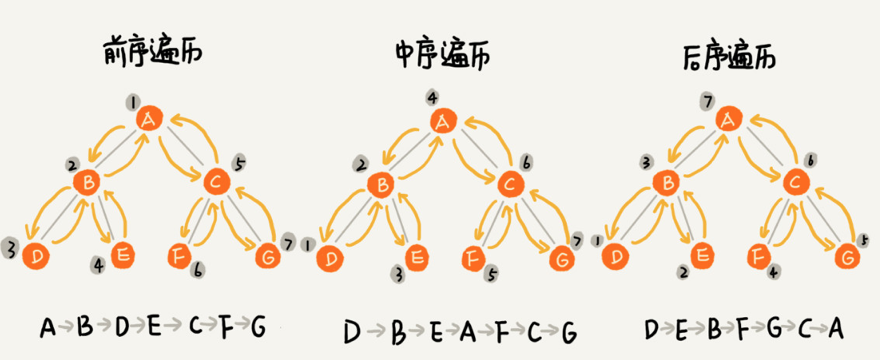


In [ ]:
class traversal:
    def __init__(self):
        self.pre = []
        self.inside = []
        self.subsequent = []

    '''
    二叉树前序遍历
    '''
    def preTraversal(self, root: node):
        if root == None:
            return
        self.pre.append(root.v)
        self.preTraversal(root.left)
        self.preTraversal(root.right)

    '''
    二叉树中序遍历
    '''
    def inTraversal(self, root: node):
        if root == None:
            return
        self.inTraversal(root.left)
        self.inside.append(root.v)
        self.inTraversal(root.right)

    '''
    二叉树后序遍历
    '''
    def subsequentTraversal(self, root: node):
        if root == None:
            return
        self.subsequentTraversal(root.left)
        self.subsequentTraversal(root.right)
        self.subsequent.append(root.v)

给定一组数据，比如 1，3，5，6，9，10。你来算算，可以构建出多少种不同的二叉树？
-- 完全二叉树，可以用数组存储，组合方式就是 n!

我们讲了三种二叉树的遍历方式，前、中、后序。实际上，还有另外一种遍历方式，也就是按层遍历，你知道如何实现吗？
-- 图的广度优先遍历

#### 二叉查找树

在树中的任意一个节点，其左子树中的每个节点的值，都要小于这个节点的值，而右子树节点的值都大于这个节点的值。查找、插入、删除等很多操作的时间复杂度都跟树的高度成正比。

时间复杂度：两个极端情况的时间复杂度分别是 O(n) 和 O(logn)，分别对应二叉树退化成链表的情况和完全二叉树。

散列表的插入、删除、查找操作的时间复杂度可以做到常量级的 O(1)，非常高效。而二叉查找树在比较平衡的情况下，插入、删除、查找操作时间复杂度才是 O(logn)，相对散列表，好像并没有什么优势，那我们为什么还要用二叉查找树呢？
1. 第一，散列表中的数据是无序存储的，如果要输出有序的数据，需要先进行排序。而对于二叉查找树来说，我们只需要中序遍历，就可以在 O(n) 的时间复杂度内，输出有序的数据序列。
2. 第二，散列表扩容耗时很多，而且当遇到散列冲突时，性能不稳定，尽管二叉查找树的性能不稳定，但是在工程中，我们最常用的平衡二叉查找树的性能非常稳定，时间复杂度稳定在 O(logn)。
3. 第三，笼统地来说，尽管散列表的查找等操作的时间复杂度是常量级的，但因为哈希冲突的存在，这个常量不一定比 logn 小，所以实际的查找速度可能不一定比 O(logn) 快。加上哈希函数的耗时，也不一定就比平衡二叉查找树的效率高。
4. 第四，散列表的构造比二叉查找树要复杂，需要考虑的东西很多。比如散列函数的设计、冲突解决办法、扩容、缩容等。平衡二叉查找树只需要考虑平衡性这一个问题，而且这个问题的解决方案比较成熟、固定。
5. 最后，为了避免过多的散列冲突，散列表装载因子不能太大，特别是基于开放寻址法解决冲突的散列表，不然会浪费一定的存储空间。
